In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
from urllib.parse import urlencode

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [5]:
# Чтение данных из облака
def download_link(public_key):

    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [6]:
transactions_df = pd.read_csv(download_link('https://disk.yandex.ru/d/NNX-_LTemR_Stg'))

In [7]:
transactions_df.shape

(5315, 3)

In [8]:
transactions_df.dtypes

date           object
name           object
transaction    object
dtype: object

In [9]:
transactions_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [10]:
transactions_df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

<AxesSubplot:>

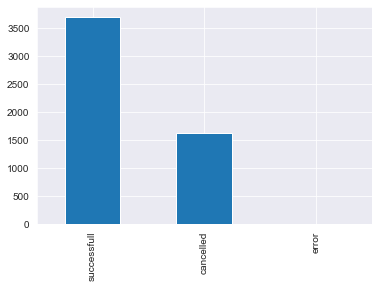

In [11]:
transactions_df.transaction.value_counts() \
    .plot(kind='bar')

In [12]:
transactions_df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [13]:
transactions_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций

In [14]:
transactions_by_users = transactions_df.query("transaction == 'successfull'") \
    .groupby('name', as_index=False) \
    .agg({'transaction': 'count'})

In [15]:
transactions_by_users.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


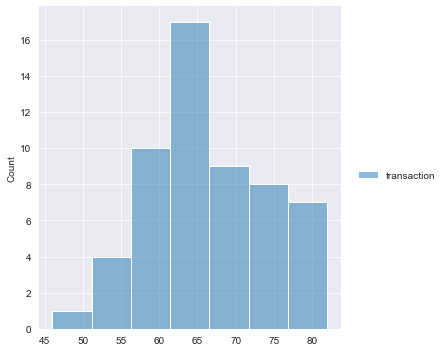

In [16]:
sns.displot(transactions_by_users)

In [17]:
transactions_by_users.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [18]:
updated_df = pd.read_csv(download_link('https://disk.yandex.ru/d/WH1IwP1Xs39N0Q'))

In [19]:
updated_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [20]:
user_vs_minute_pivot = updated_df.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)

Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [21]:
updated_df['date'] = pd.to_datetime(updated_df.date)

In [22]:
updated_df['true_minute'] = updated_df.date.dt.hour * 60 + updated_df.date.dt.minute

In [23]:
true_minute_df =  updated_df.groupby('true_minute', as_index=False) \
        .agg({'transaction': 'count'})

<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

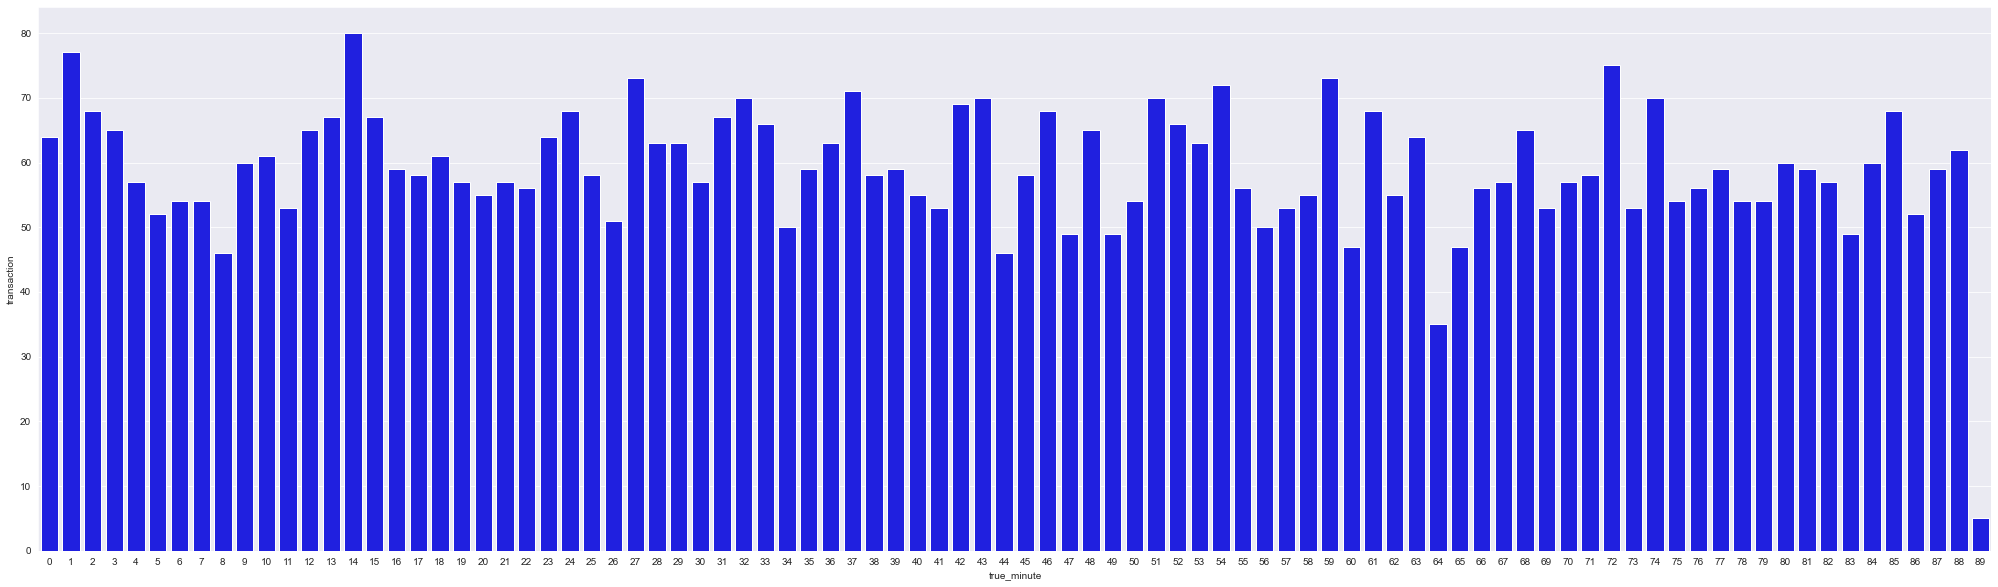

In [27]:
plt.figure(figsize=(35, 10))
sns.barplot(x='true_minute', y='transaction', data=true_minute_df, color='b')